# **DBSCAN**

: 밀도 기반 군집화의 대표적인 알고리즘. 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능.

내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트로 군집화한다고 가정할 때 앞에서 소개한 K-means, MA, GMM으로는 효과적인 군집화를 수행하기 어려움.

DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행.

DBSCAN은 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식.

---
주요 파라미터
* **입실론 주변 영역(eps)** : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
* **최소 데이터 개수(min_samples)** : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

---
* 핵심 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 함.
* 이웃 포인트 : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함.
* 경계 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 함.
* 잡음 포인트 : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 함.

DBSCAN 적용하기 - 붓꽃 데이터 세트

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

In [2]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미.

위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화됨.

DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미.



In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline  # (주피터에서만 필요)

def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):
    if dataframe is None:
        print("Error: DataFrame is required.")
        return

    unique_labels = np.unique(dataframe[label_name])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    plt.figure(figsize=(8, 6))

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]

        plt.scatter(
            x=label_cluster['ftr1'],
            y=label_cluster['ftr2'],
            edgecolor='k',
            s=60,
            marker=markers[int(label) % len(markers)],
            label=f"Cluster {label}"
        )

        # 군집 중심 표시
        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):
            center_x_y = cluster_result.cluster_centers_[int(label)]

            plt.scatter(
                x=center_x_y[0], y=center_x_y[1],
                s=200,
                color='gray',
                alpha=0.9,
                marker=markers[int(label) % len(markers)]
            )
            plt.scatter(
                x=center_x_y[0], y=center_x_y[1],
                s=70,
                color='k',
                marker=f'${label}$'
            )

    plt.title("Cluster Visualization")
    plt.xlabel("ftr1")
    plt.ylabel("ftr2")
    plt.legend()
    plt.grid(True)
    plt.show()

UsageError: unrecognized arguments: # (주피터에서만 필요)


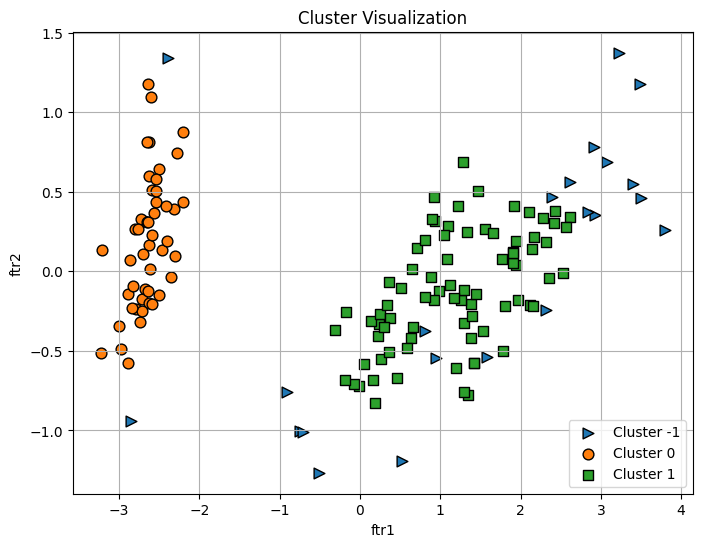

In [45]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca=PCA(n_components=2,random_state=0)
pca_transformed=pca.fit_transform(iris.data)
# visualize_clusterj)lot( ) 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요.

eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어듦.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


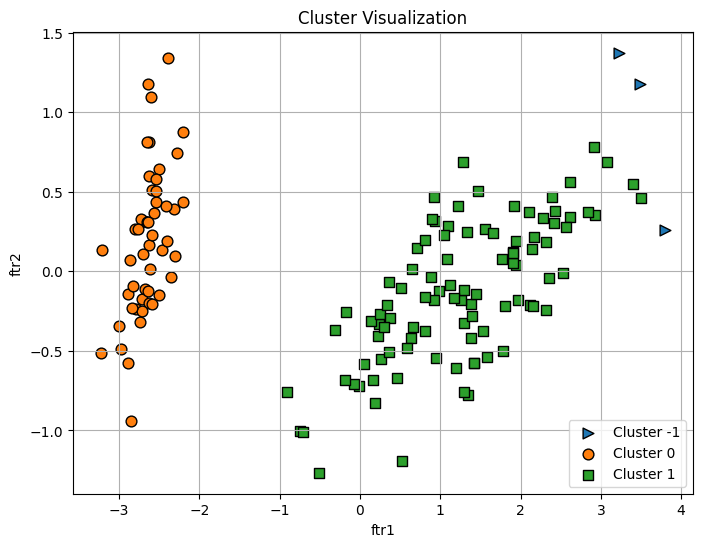

In [47]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target'] = iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

노이즈 군집인 -1이 3개밖에 없음.

In [48]:
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')

DBSCAN 적용하기 - make_circles() 데이터 세트

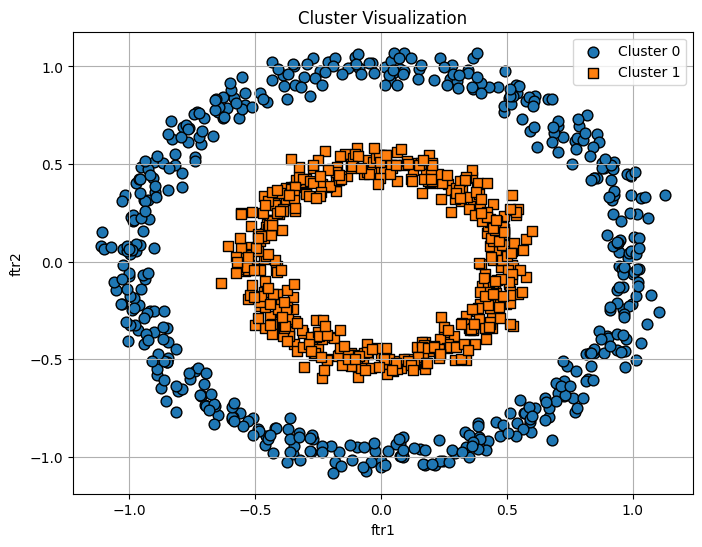

In [49]:
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

K-평균으로 make_circles() 데이터 세트를 군집화

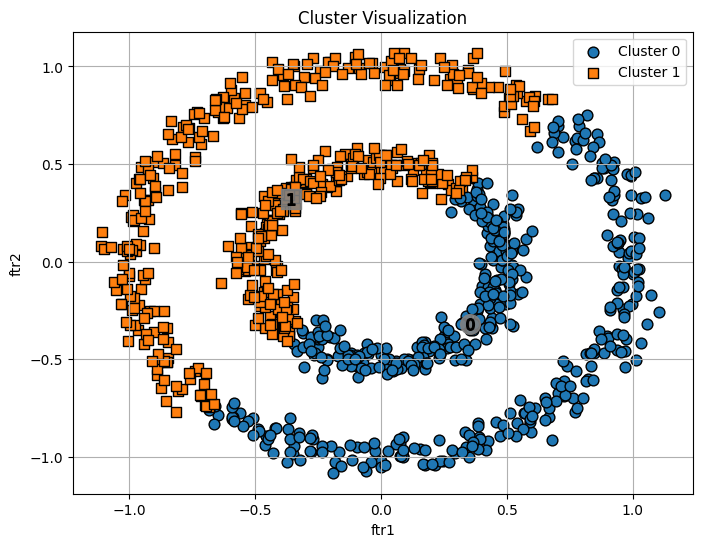

In [50]:
# KMeans로 make_circles( ) 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans,clusterDF,'kmeans_cluster',iscenter=True)

GMM을 적용

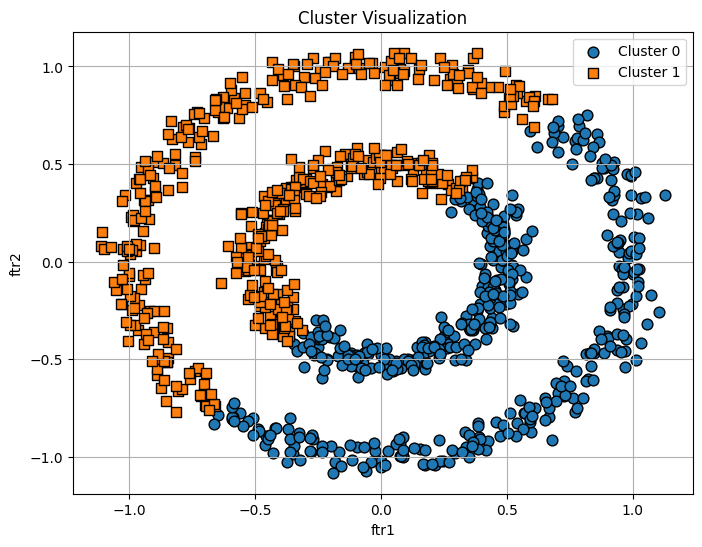

In [51]:
# GMM으로 make_circles( ) 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2,random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm,clusterDF,'gmm_cluster',iscenter=False)

 DBSCAN으로 군집화를 적용

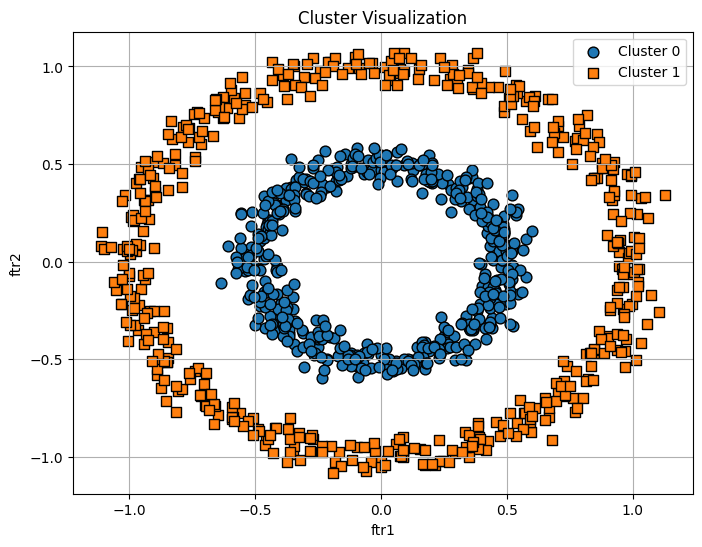

In [52]:
# DBSCAN으로 make_circles( ) 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2,min_samples=10,metric='euclidean')
dbscan_label=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_label
visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter=False)

군집화 실습 - 고객 세그먼테이션

In [53]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df=pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [54]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [55]:
retail_df=retail_df[retail_df['Quantity']>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [56]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [57]:
retail_df=retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


 RFM 기반 데이터 가공

In [58]:
retail_df['sale_amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

In [59]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [60]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

In [61]:
aggregations={
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}
cust_df=retail_df.groupby('CustomerID').agg(aggregations)
cust_df=cust_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'sale_amount': 'Monetary'
})
cust_df=cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [62]:
import datetime as dt

cust_df['Recency']=dt.datetime(2011,12,10)-cust_df['Recency']
cust_df['Recency']=cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는',cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


RFM 기반 고객 세그먼테이션

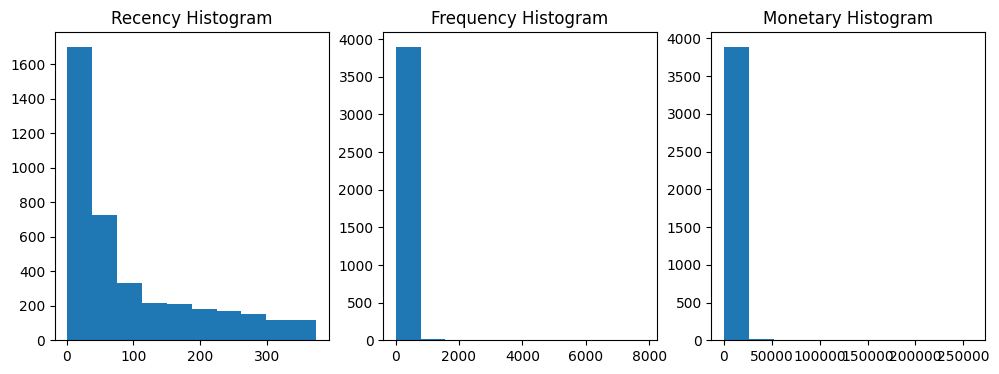

In [63]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(12,4),nrows=1,ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

In [64]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X_features=cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.576


In [66]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

def visualize_silhouette(cluster_lists, X_features):
    # Visualize Silhouette for each n in cluster_lists
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_features)

        silhouette_avg = silhouette_score(X_features, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10

        axs[ind].set_title(
            f'Number of Cluster : {n_cluster}\nSilhouette Score : {round(silhouette_avg, 3)}'
        )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7
            )

            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()


def visualize_kmeans_plot_multi(cluster_lists, X_features, iscenter=False):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    pca = PCA(n_components=2, random_state=0)
    pca_transformed = pca.fit_transform(X_features)

    dataframe = pd.DataFrame(data=pca_transformed, columns=['ftr1', 'ftr2'])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_features)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(dataframe['cluster'])

        for label in unique_labels:
            label_cluster = dataframe[dataframe['cluster'] == label]
            axs[ind].scatter(
                x=label_cluster['ftr1'],
                y=label_cluster['ftr2'],
                edgecolor='k',
                marker=markers[label % len(markers)]
            )

        if iscenter and hasattr(kmeans, 'cluster_centers_'):
            center_x_y = pca.transform(kmeans.cluster_centers_)
            for label, center in enumerate(center_x_y):
                axs[ind].scatter(
                    x=center[0], y=center[1],
                    s=200, color='gray', alpha=0.9,
                    marker=markers[label % len(markers)]
                )
                axs[ind].scatter(
                    x=center[0], y=center[1],
                    s=70, color='k', edgecolor='k',
                    marker=f'${label}$'
                )

        axs[ind].set_title(f'Number of Cluster : {n_cluster}')
        axs[ind].set_xlabel('ftr1')
        axs[ind].set_ylabel('ftr2')

    plt.tight_layout()
    plt.show()

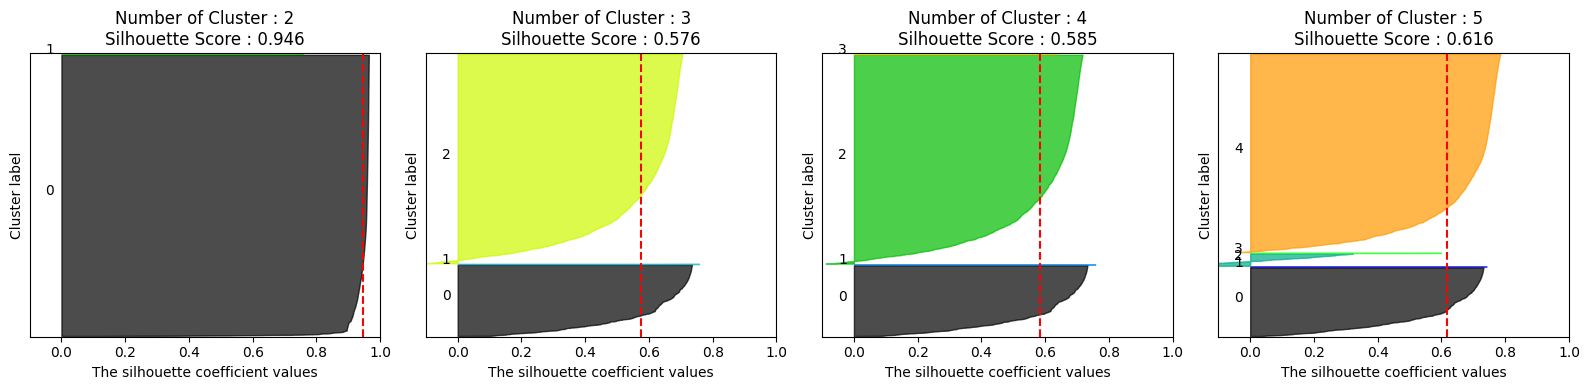

/tmp/ipython-input-2457799168.py:79: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(
/tmp/ipython-input-2457799168.py:79: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(


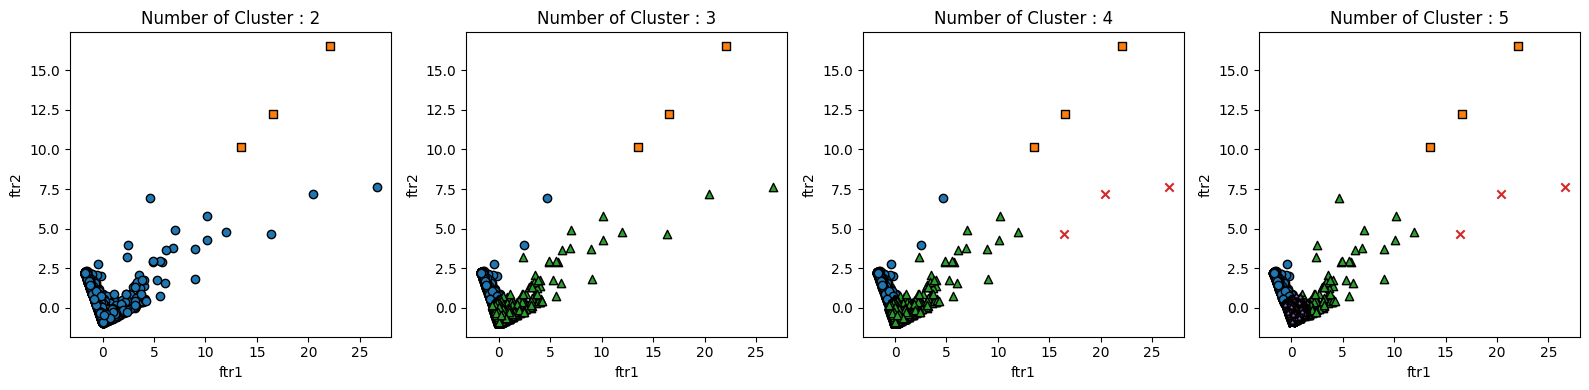

In [67]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 칼럼에 np.loglpO로 Log Transformation
cust_df['Recency_log']=np.log1p(cust_df['Recency'])
cust_df['Frequency_log']=np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']=np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features=cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는: 0.303


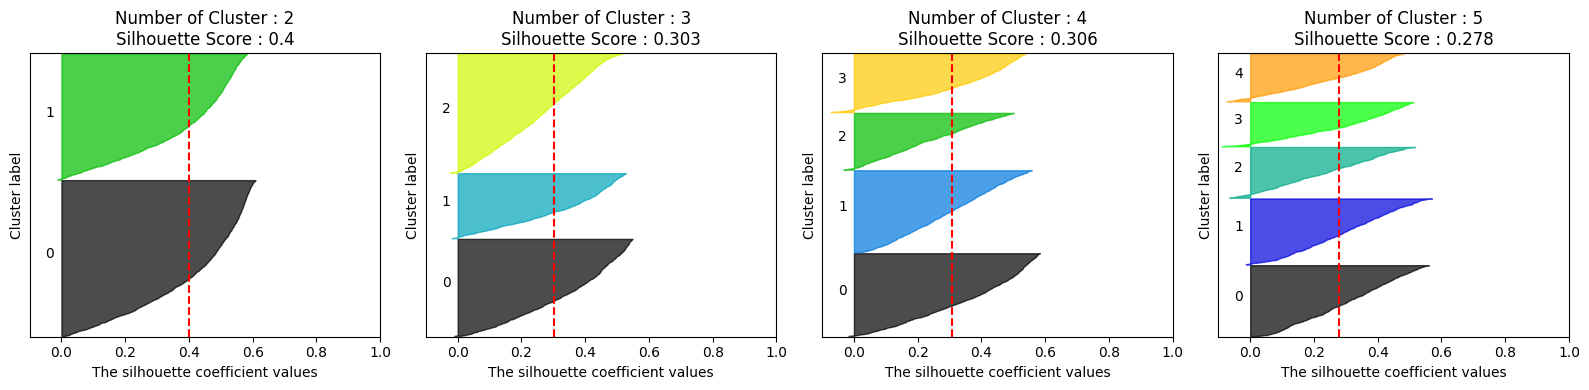

/tmp/ipython-input-2457799168.py:79: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(
/tmp/ipython-input-2457799168.py:79: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(


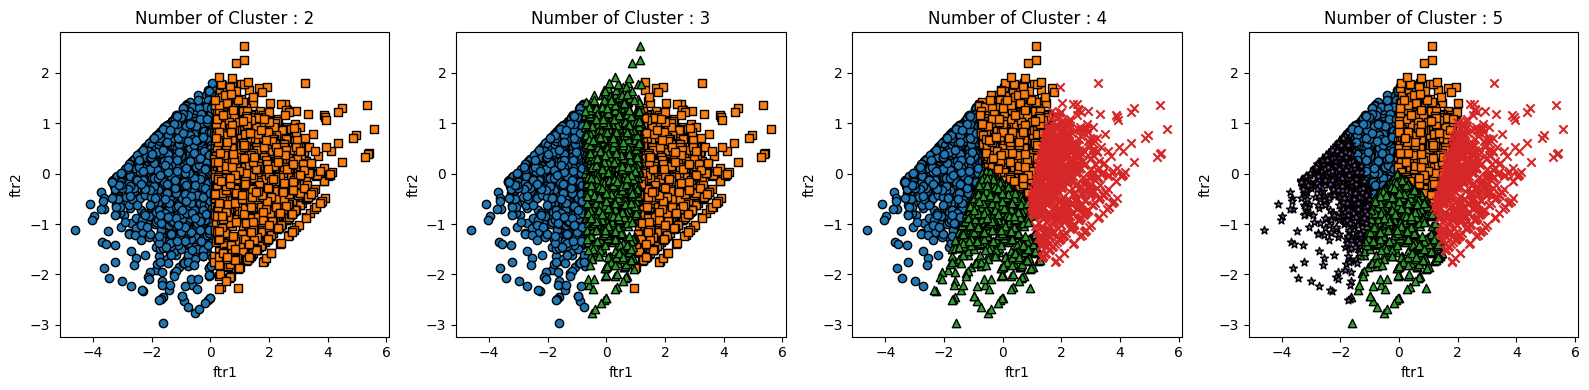

In [69]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)